<a href="https://colab.research.google.com/github/UsuarioVoltaire/Fundamentos-IA/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clasificar imágenes de MNIST

La base de datos MNIST es uno de los conjuntos de datos más populares y ampliamente utilizados en el campo del aprendizaje automático y la visión por computadora.

Está compuesto por 70,000 imágenes de dígitos manuscritos que van del 0 al 9. Cada imagen es en escala de grises con una resolución de 28x28 píxeles y está etiquetada con el dígito correspondiente. Además, los dígitos están centrados en cada una de las imágenes.

MNIST se suele utilizar para evaluar algoritmos de clasificación, desarrollar nuevos algoritmos y para la educación, ya que es un excelente recurso para enseñar conceptos básicos de aprendizaje automático o máquina.

In [1]:
## Importamos librerías
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

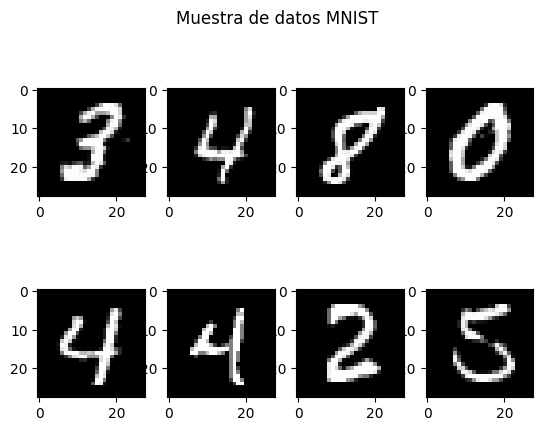

In [2]:
## Cargamos los datos en formato .csv mediante la librería pandas
digits = pd.read_csv("train.csv").values

# Definimos datos de entrenamiento con su etiqueta (21,100 imágenes)
caracteristicas = digits[0:21100, 1:]
clases = digits[0:21100, 0]

# Datos de prueba con su etiqueta (20,900 imágenes)
prueba = digits[21100:42000,1:]
numero = digits[21100:42000,0]

# Tomamos un dato al azar para predecirlo más adelante
azar = random.choice(range(0, 100))

# Tomamos 8 datos al azar para mostrarlos y los reordenamos a 28x28
show = []
for i in range(9):
  c = caracteristicas[random.choice(range(0, 20900))]
  c.shape = (28,28)
  show.append(c)

# Mostramos los datos
f, axarr = plt.subplots(2,4);
f.suptitle("Muestra de datos MNIST");
i = 0
for r in range(2):
  for c in range(4):
    i = i +1
    axarr[r, c].imshow(255-show[i], cmap=plt.cm.gray_r)

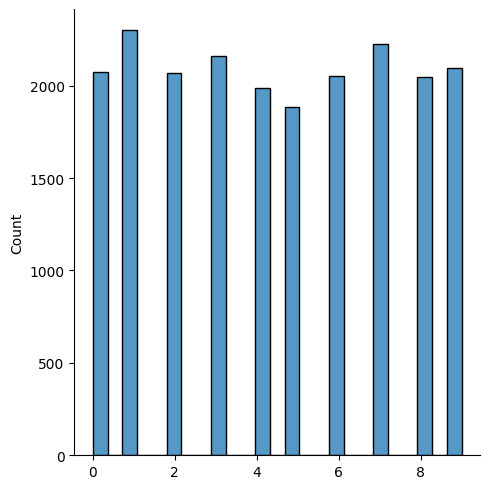

In [3]:
## Mostrando distribución de las clases
sns.displot(digits[21100:42000,0])
plt.show()

Predicción:  [0]
Real:  0


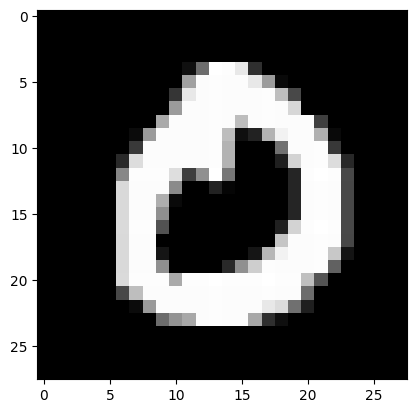

Exactitud:  91.09569377990431


In [4]:
# Instanciamos un clasificador
clf = SVC(kernel='linear', C = 1)
#clf = DecisionTreeClassifier()

# Entrenamos clasificador
clf.fit(caracteristicas, clases)

# Probamos con dato tomado al azar y lo mostramos
d = prueba[azar]
d.shape = (28,28)
print('Predicción: ', clf.predict([prueba[azar]]))
print('Real: ', numero[azar])
plt.imshow(255-d, cmap=plt.cm.gray_r)
plt.show()

# Probamos con todos los datos de prueba
p = clf.predict(prueba)

# Calculamos el porcentaje de datos correctos
count = 0
for i in range(0, 20900):
    count+=1 if p[i]==numero[i] else 0
print("Exactitud: ", (count/20900)*100)

[0.91208531 0.91587678 0.90616114 0.91398104 0.91350711]
Exactitud: 0.9123222748815166 % Desviación estándar: (+/- 0.006621516283060844)


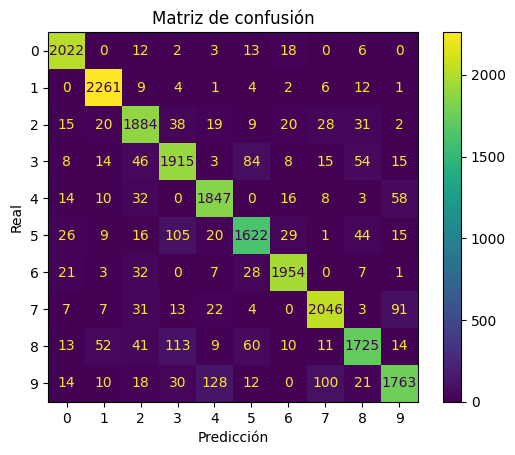

In [5]:
# Validación cruzada

scores = cross_val_score(clf, caracteristicas, clases, cv=5)
print(scores)
print("Exactitud: {0} % Desviación estándar: (+/- {1})".format(scores.mean(), scores.std() * 2))

# Matriz de confusión

conf = metrics.confusion_matrix(numero, p)
matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=conf)
matrix.plot()
matrix.ax_.set(title="Matriz de confusión")
matrix.ax_.set(xlabel="Predicción", ylabel="Real")
plt.show()